In [1]:
pip install pdfplumber

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pdfplumber

pdf_file_path = 'file.pdf'

pdf = pdfplumber.open(pdf_file_path)

dfs = []
page_numbers = range(0, 14)

for page_number in page_numbers:
    page = pdf.pages[page_number]
    table = page.extract_table()
    df = pd.DataFrame(table)
    dfs.append(df)

W = pd.concat(dfs, ignore_index=True)

pdf.close()


In [4]:
W.head(10)

,0,1,2,3,4,5,6
0,Txn Date,Value\nDate,Description,Ref No./Cheque\nNo.,Debit,Credit,Balance
1,3 Oct 2022,3 Oct 2022,TO TRANSFER-\nUPI/DR/227606438239/AMIT\nSIN/NT...,TRANSFER TO\n4695560162096,130.00,,"1,55,433.01"
2,4 Oct 2022,4 Oct 2022,TO TRANSFER-\nUPI/DR/227732272169/AMIT\nSIN/NT...,TRANSFER TO\n4693918162099,113.00,,"1,55,320.01"
3,4 Oct 2022,4 Oct 2022,TO TRANSFER-\nUPI/DR/227737195959/haldwa\nni/P...,TRANSFER TO\n4692463162090,"2,146.00",,"1,53,174.01"
4,5 Oct 2022,5 Oct 2022,TO TRANSFER-\nUPI/DR/227858686841/NEEMA\nPA/YE...,TRANSFER TO\n4692520162095,430.00,,"1,52,744.01"
5,6 Oct 2022,6 Oct 2022,TO TRANSFER-INB Billpay ~\nFranklin Templeton ...,IB95647795\nTRANSFER TO\n3199637162096,"1,500.00",,"1,51,244.01"
6,6 Oct 2022,6 Oct 2022,TO TRANSFER-\nUPI/DR/227981162853/Mr\nVikra/PY...,TRANSFER TO\n4696096162096,87.00,,"1,51,157.01"
7,7 Oct 2022,7 Oct 2022,TO TRANSFER-\nUPI/DR/228006617168/Mr\nVikra/PY...,TRANSFER TO\n4692604162092,87.00,,"1,51,070.01"
8,7 Oct 2022,7 Oct 2022,TO TRANSFER-\nUPI/DR/228020744649/KHASTI\nB/PU...,TRANSFER TO\n4695701162099,501.00,,"1,50,569.01"
9,8 Oct 2022,8 Oct 2022,BY TRANSFER-\nUPI/CR/228124061602/GOOG\nLEPAY/...,TRANSFER\nFROM\n5098707162097,,6.00,"1,50,575.01"


In [5]:
W=W.take([0,2,4,5,6],axis=1)
W.head()

,0,2,4,5,6
0,Txn Date,Description,Debit,Credit,Balance
1,3 Oct 2022,TO TRANSFER-\nUPI/DR/227606438239/AMIT\nSIN/NT...,130.00,,"1,55,433.01"
2,4 Oct 2022,TO TRANSFER-\nUPI/DR/227732272169/AMIT\nSIN/NT...,113.00,,"1,55,320.01"
3,4 Oct 2022,TO TRANSFER-\nUPI/DR/227737195959/haldwa\nni/P...,"2,146.00",,"1,53,174.01"
4,5 Oct 2022,TO TRANSFER-\nUPI/DR/227858686841/NEEMA\nPA/YE...,430.00,,"1,52,744.01"


In [6]:
W.columns = W.iloc[0] 
W= W[1:]  
W.reset_index(drop=True, inplace=True)
W.head()

,Txn Date,Description,Debit,Credit,Balance
0,3 Oct 2022,TO TRANSFER-\nUPI/DR/227606438239/AMIT\nSIN/NT...,130.00,,"1,55,433.01"
1,4 Oct 2022,TO TRANSFER-\nUPI/DR/227732272169/AMIT\nSIN/NT...,113.00,,"1,55,320.01"
2,4 Oct 2022,TO TRANSFER-\nUPI/DR/227737195959/haldwa\nni/P...,"2,146.00",,"1,53,174.01"
3,5 Oct 2022,TO TRANSFER-\nUPI/DR/227858686841/NEEMA\nPA/YE...,430.00,,"1,52,744.01"
4,6 Oct 2022,TO TRANSFER-INB Billpay ~\nFranklin Templeton ...,"1,500.00",,"1,51,244.01"


In [7]:
W.tail()

,Txn Date,Description,Debit,Credit,Balance
307,2 May 2023,TO TRANSFER-\nUPI/DR/312283334221/BISHA\nN /SB...,101.00,,"38,596.56"
308,Txn Date,Description,Debit,Credit,Balance
309,3 May 2023,TO TRANSFER-\nUPI/DR/312396016699/Mr\nVikra/PY...,150.00,,"38,446.56"
310,3 May 2023,BY TRANSFER-\nUPI/CR/312338198069/GOOG\nLEPAY/...,,5.00,"38,451.56"
311,4 May 2023,TO TRANSFER-\nUPI/DR/312432856284/Mr\nVikra/PY...,66.00,,"38,385.56"


In [8]:
W = W[~W['Description'].str.contains('Description', case=False, na=False)]
W

,Txn Date,Description,Debit,Credit,Balance
0,3 Oct 2022,TO TRANSFER-\nUPI/DR/227606438239/AMIT\nSIN/NT...,130.00,,"1,55,433.01"
1,4 Oct 2022,TO TRANSFER-\nUPI/DR/227732272169/AMIT\nSIN/NT...,113.00,,"1,55,320.01"
2,4 Oct 2022,TO TRANSFER-\nUPI/DR/227737195959/haldwa\nni/P...,"2,146.00",,"1,53,174.01"
3,5 Oct 2022,TO TRANSFER-\nUPI/DR/227858686841/NEEMA\nPA/YE...,430.00,,"1,52,744.01"
4,6 Oct 2022,TO TRANSFER-INB Billpay ~\nFranklin Templeton ...,"1,500.00",,"1,51,244.01"
...,...,...,...,...,...
306,2 May 2023,TO TRANSFER-\nUPI/DR/312283242108/EURON\nETG/I...,666.00,,"38,697.56"
307,2 May 2023,TO TRANSFER-\nUPI/DR/312283334221/BISHA\nN /SB...,101.00,,"38,596.56"
309,3 May 2023,TO TRANSFER-\nUPI/DR/312396016699/Mr\nVikra/PY...,150.00,,"38,446.56"
310,3 May 2023,BY TRANSFER-\nUPI/CR/312338198069/GOOG\nLEPAY/...,,5.00,"38,451.56"


In [9]:
W.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 311
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Txn Date     299 non-null    object
 1   Description  299 non-null    object
 2   Debit        299 non-null    object
 3   Credit       299 non-null    object
 4   Balance      299 non-null    object
dtypes: object(5)
memory usage: 14.0+ KB


#### **Fill blank spaces**

In [10]:
W['Debit'] =W['Debit'].str.replace(',', '', regex=True)
W['Debit'] = pd.to_numeric(W['Debit'], errors='coerce').fillna(0.0)
W['Debit']=W['Debit'].astype(float)

In [11]:
W['Credit'] =W['Credit'] .str.replace(',', '', regex=True)
W['Credit']=pd.to_numeric(W['Credit'], errors='coerce').fillna(0.0)

In [12]:
W['Balance'] =W['Balance'] .str.replace(',', '', regex=True)
W['Balance']=W['Balance'].astype(float)

In [13]:
W['Txn Date'] =W['Txn Date'] .str.replace('\n', ' ', regex=True)

In [14]:
W.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 311
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Txn Date     299 non-null    object 
 1   Description  299 non-null    object 
 2   Debit        299 non-null    float64
 3   Credit       299 non-null    float64
 4   Balance      299 non-null    float64
dtypes: float64(3), object(2)
memory usage: 14.0+ KB


#### **Total spending**

In [15]:
W['Debit'].sum()

168523.66

##### **Highest spending**

In [16]:
W.nlargest(10,'Debit')

,Txn Date,Description,Debit,Credit,Balance
61,18 Nov 2022,TO TRANSFER-\nUPI/DR/232277504738/VAIBH\nAV /S...,100000.0,0.0,47225.17
174,1 Feb 2023,TO TRANSFER-\nUPI/DR/303260486865/BATA\nIND/HD...,2904.0,0.0,52193.64
226,6 Mar 2023,TO TRANSFER-\nUPI/DR/306588549880/billdesk/\nI...,2390.0,0.0,51552.23
162,23 Jan 2023,TO TRANSFER-\nUPI/DR/302312210557/SHATR\nUDH/B...,2150.0,0.0,56522.64
2,4 Oct 2022,TO TRANSFER-\nUPI/DR/227737195959/haldwa\nni/P...,2146.0,0.0,153174.01
78,30 Nov 2022,TO TRANSFER-\nUPI/DR/233490191584/CHAND\nER /H...,2100.0,0.0,39071.17
67,20 Nov 2022,TO TRANSFER-\nUPI/DR/232463086282/DEEP\nCHA/BD...,2000.0,0.0,43365.17
184,7 Feb 2023,TO TRANSFER-INB Billpay ~\nFranklin Templeton ...,2000.0,0.0,49172.64
225,6 Mar 2023,TO TRANSFER-INB Billpay ~\nFranklin Templeton ...,2000.0,0.0,53942.23
274,7 Apr 2023,TO TRANSFER-INB Billpay ~\nFranklin Templeton ...,2000.0,0.0,43871.23


#### **Highest Earning**

In [17]:
W.nlargest(10,'Credit')

,Txn Date,Description,Debit,Credit,Balance
133,5 Jan 2023,BY CLEARING / CHEQUE-\nBOB 263012356-000103\n2...,0.0,30983.00,64936.14
186,7 Feb 2023,BY TRANSFER-\nNEFT*HDFC0000240*N038232\n320250...,0.0,14581.59,63754.23
10,8 Oct 2022,BULK POSTING-ACHCr\nNACH00000000060232 RKSV\nS...,0.0,2947.17,153434.18
108,17 Dec 2022,BY TRANSFER-\nNEFT*HDFC0000240*N351222\n251576...,0.0,1008.97,36219.14
120,25 Dec 2022,CREDIT INTEREST--,0.0,703.00,35045.14
254,25 Mar 2023,CREDIT INTEREST--,0.0,359.00,48733.23
105,16 Dec 2022,BY TRANSFER-\nUPI/CR/235034491181/TANMA\nY G/B...,0.0,200.00,35356.17
18,12 Oct 2022,BULK POSTING-ACHCr\nIBKL00194000008709 IRFC\nLTD-,0.0,176.40,153011.17
275,7 Apr 2023,BULK POSTING-ACHCr\nNACH00000000060232 RKSV\nS...,0.0,110.33,43981.56
15,11 Oct 2022,BULK POSTING-ACHCr\nINDB00037000007953 POWER\n...,0.0,93.75,153256.93


#### **Total earning**

In [18]:
W['Credit'].sum()

51346.21

In [19]:
credit=W[W['Credit']!=0]
credit

,Txn Date,Description,Debit,Credit,Balance
8,8 Oct 2022,BY TRANSFER-\nUPI/CR/228124061602/GOOG\nLEPAY/...,0.0,6.00,150575.01
10,8 Oct 2022,BULK POSTING-ACHCr\nNACH00000000060232 RKSV\nS...,0.0,2947.17,153434.18
15,11 Oct 2022,BULK POSTING-ACHCr\nINDB00037000007953 POWER\n...,0.0,93.75,153256.93
18,12 Oct 2022,BULK POSTING-ACHCr\nIBKL00194000008709 IRFC\nLTD-,0.0,176.40,153011.17
34,27 Oct 2022,BY TRANSFER-\nUPI/CR/230028388043/GOOG\nLEPAY/...,0.0,6.00,151087.17
57,13 Nov 2022,BY TRANSFER-\nUPI/CR/231787524593/GOOG\nLEPAY/...,0.0,6.00,148154.17
63,18 Nov 2022,BY TRANSFER-\nUPI/CR/232241200534/GOOG\nLEPAY/...,0.0,6.00,47231.17
70,22 Nov 2022,BY TRANSFER-\nUPI/CR/232657890492/GOOG\nLEPAY/...,0.0,6.00,42098.17
79,30 Nov 2022,BY TRANSFER-\nUPI/CR/233492511193/GOOG\nLEPAY/...,0.0,6.00,39077.17
94,9 Dec 2022,BY TRANSFER-\nUPI/CR/234380032146/GOOG\nLEPAY/...,0.0,38.00,36529.17


In [20]:
credit.count()

0
Txn Date       29
Description    29
Debit          29
Credit         29
Balance        29
dtype: int64

#### **Total Franklin spending**

In [21]:
Franklin=W[W['Description'].str.contains('Franklin Templeton',case=False,na=False)]
Franklin

,Txn Date,Description,Debit,Credit,Balance
4,6 Oct 2022,TO TRANSFER-INB Billpay ~\nFranklin Templeton ...,1500.0,0.0,151244.01
51,7 Nov 2022,TO TRANSFER-INB Billpay ~\nFranklin Templeton ...,1500.0,0.0,148526.17
89,7 Dec 2022,TO TRANSFER-INB Billpay ~\nFranklin Templeton ...,1500.0,0.0,37014.17
138,7 Jan 2023,TO TRANSFER-INB Billpay ~\nFranklin Templeton ...,1500.0,0.0,63247.14
184,7 Feb 2023,TO TRANSFER-INB Billpay ~\nFranklin Templeton ...,2000.0,0.0,49172.64
225,6 Mar 2023,TO TRANSFER-INB Billpay ~\nFranklin Templeton ...,2000.0,0.0,53942.23
274,7 Apr 2023,TO TRANSFER-INB Billpay ~\nFranklin Templeton ...,2000.0,0.0,43871.23


In [22]:
Franklin=Franklin['Debit'].sum()
Franklin

12000.0

### **Vikram and mini spending**

In [23]:
V=W[W['Description'].str.contains('Vikra/PY|mini',case=False,na=False)]
V

,Txn Date,Description,Debit,Credit,Balance
5,6 Oct 2022,TO TRANSFER-\nUPI/DR/227981162853/Mr\nVikra/PY...,87.0,0.0,151157.01
6,7 Oct 2022,TO TRANSFER-\nUPI/DR/228006617168/Mr\nVikra/PY...,87.0,0.0,151070.01
9,8 Oct 2022,TO TRANSFER-\nUPI/DR/228131194981/Mr\nVikra/PY...,88.0,0.0,150487.01
11,9 Oct 2022,TO TRANSFER-\nUPI/DR/228257764636/Mr\nVikra/PY...,107.0,0.0,153327.18
13,10 Oct 2022,TO TRANSFER-\nUPI/DR/228383405231/Mr\nVikra/PY...,77.0,0.0,153250.18
...,...,...,...,...,...
302,30 Apr 2023,TO TRANSFER-\nUPI/DR/312086745857/Mr\nVikra/PY...,66.0,0.0,39569.56
304,1 May 2023,TO TRANSFER-\nUPI/DR/312121495157/Mr\nVikra/PY...,86.0,0.0,39459.56
305,2 May 2023,TO TRANSFER-\nUPI/DR/312257541232/Mr\nVikra/PY...,96.0,0.0,39363.56
309,3 May 2023,TO TRANSFER-\nUPI/DR/312396016699/Mr\nVikra/PY...,150.0,0.0,38446.56


##### **Total amount spend**

In [24]:
Vikram=V['Debit'].sum()
Vikram

19829.0

##### **Maximum amount spend**

In [25]:
V['Debit'].max()

765.0

##### **Minimum amount spend**

In [26]:
V['Debit'].min()

15.0

##### **Average spending per day**

In [27]:
V['Debit'].mean()

110.16111111111111

##### **Minimum amount payed**

In [28]:
V['Debit'].idxmin()

258

In [29]:
V['Debit'].nsmallest()

258    15.0
123    40.0
237    54.0
292    56.0
28     63.0
Name: Debit, dtype: float64

In [30]:
V['Debit'].idxmax()

282

##### **Maximum amount payed**

In [31]:
V['Debit'].nlargest()

282    765.0
298    730.0
164    570.0
242    510.0
235    430.0
Name: Debit, dtype: float64

#### **Total amount payed to vaibhav**

In [32]:
Vaibhav=W[W['Description'].str.contains('Vaibhav',case=False,na=False)]
Vaibhav=Vaibhav['Debit'].sum()
Vaibhav

100101.0

#### **Total amount payed to Toyish**

In [33]:
T=W[W['Description'].str.contains('toy',case=False,na=False)]

Toyish=T['Debit'].sum()
Toyish

538.0

In [34]:
T

,Txn Date,Description,Debit,Credit,Balance
49,7 Nov 2022,TO TRANSFER-\nUPI/DR/231198581391/TOYIS\nH G/H...,73.0,0.0,150076.17
99,14 Dec 2022,TO TRANSFER-\nUPI/DR/234895847567/TOYIS\nH G/Y...,465.0,0.0,35736.17


#### **Bishan**

In [35]:
B=W[W['Description'].str.contains('Bishan',case=False,na=False)]

In [36]:
B

,Txn Date,Description,Debit,Credit,Balance
230,9 Mar 2023,TO TRANSFER-\nUPI/DR/306879142925/BISHA\nN /SB...,101.0,0.0,51253.23
307,2 May 2023,TO TRANSFER-\nUPI/DR/312283334221/BISHA\nN /SB...,101.0,0.0,38596.56


#### **Tanmay**

In [37]:
B1=W[W['Description'].str.contains('Tanm',case=False,na=False)]
B1

,Txn Date,Description,Debit,Credit,Balance
68,22 Nov 2022,TO TRANSFER-\nUPI/DR/232666158485/TANMA\nY G/B...,1147.0,0.0,42218.17
102,16 Dec 2022,TO TRANSFER-\nUPI/DR/235030761849/TANMA\nY G/B...,187.0,0.0,35216.17
105,16 Dec 2022,BY TRANSFER-\nUPI/CR/235034491181/TANMA\nY G/B...,0.0,200.0,35356.17
110,18 Dec 2022,TO TRANSFER-\nUPI/DR/235277294195/TANMA\nY G/B...,890.0,0.0,35266.14
151,16 Jan 2023,BY TRANSFER-\nUPI/CR/301664386066/TANMA\nY G/B...,0.0,51.0,59308.14
171,30 Jan 2023,TO TRANSFER-\nUPI/DR/303005188091/TANMA\nY G/B...,261.0,0.0,55223.64
211,22 Feb 2023,TO TRANSFER-\nUPI/DR/305389969993/TANMA\nY G/B...,369.0,0.0,58511.23


In [38]:
B1['Debit'].sum()

2854.0

In [39]:
B1['Credit'].sum()

251.0

#### **TV,mobile,Electricity and Water**

In [40]:
B11=W[W['Description'].str.contains('EURON|billdesk',case=False,na=False)]
B11

,Txn Date,Description,Debit,Credit,Balance
27,20 Oct 2022,TO TRANSFER-\nUPI/DR/229348545808/EURON\nETG/I...,270.0,0.0,151864.17
59,15 Nov 2022,TO TRANSFER-\nUPI/DR/231918716606/EURON\nETG/I...,666.0,0.0,147362.17
64,19 Nov 2022,TO TRANSFER-\nUPI/DR/232302447565/billdesk/\nI...,1740.0,0.0,45491.17
100,14 Dec 2022,TO TRANSFER-\nUPI/DR/234803466032/EURON\nETG/I...,270.0,0.0,35466.17
140,8 Jan 2023,TO TRANSFER-\nUPI/DR/300842964943/billdesk/\nI...,969.0,0.0,62215.14
143,10 Jan 2023,TO TRANSFER-\nUPI/DR/301088121162/billdesk/\nI...,1749.0,0.0,60370.14
150,15 Jan 2023,TO TRANSFER-\nUPI/DR/301552708511/EURON\nETG/I...,270.0,0.0,59257.14
187,7 Feb 2023,TO TRANSFER-\nUPI/DR/303804827322/EURON\nETG/I...,666.0,0.0,63088.23
193,12 Feb 2023,TO TRANSFER-\nUPI/DR/304356669310/billdesk/\nI...,270.0,0.0,62575.23
194,12 Feb 2023,TO TRANSFER-\nUPI/DR/304357001589/EURON\nETG/I...,666.0,0.0,61909.23


In [41]:
B11['Debit'].sum()

12767.0

#### **CREDIT INTEREST**

In [42]:
c1=W[W['Description'].str.contains('CREDIT INTEREST',case=False,na=False)]
c1

,Txn Date,Description,Debit,Credit,Balance
120,25 Dec 2022,CREDIT INTEREST--,0.0,703.0,35045.14
254,25 Mar 2023,CREDIT INTEREST--,0.0,359.0,48733.23


In [43]:
c1['Credit'].sum()

1062.0

#### **MONTH**

In [44]:
def sp(Q):
    Q1=Q.split(' ')
    return Q1[1]

W['Month']=W['Txn Date'].apply(sp)
W.head(2)

,Txn Date,Description,Debit,Credit,Balance,Month
0,3 Oct 2022,TO TRANSFER-\nUPI/DR/227606438239/AMIT\nSIN/NT...,130.0,0.0,155433.01,Oct
1,4 Oct 2022,TO TRANSFER-\nUPI/DR/227732272169/AMIT\nSIN/NT...,113.0,0.0,155320.01,Oct


In [45]:
def sp(Q):
    Q1=Q.split(' ')
    return Q1[2]
W['Year']=W['Txn Date'].apply(sp)
W.head(2)

,Txn Date,Description,Debit,Credit,Balance,Month,Year
0,3 Oct 2022,TO TRANSFER-\nUPI/DR/227606438239/AMIT\nSIN/NT...,130.0,0.0,155433.01,Oct,2022
1,4 Oct 2022,TO TRANSFER-\nUPI/DR/227732272169/AMIT\nSIN/NT...,113.0,0.0,155320.01,Oct,2022


In [46]:
A=W.groupby('Month')['Debit'].sum()
A

Month
Apr      8827.00
Dec      6470.00
Feb     11903.00
Jan     10444.50
Mar      9975.00
May      1165.00
Nov    111601.00
Oct      8138.16
Name: Debit, dtype: float64

### **Monthly expenditure**

In [47]:
A = W.groupby(['Year', 'Month'])['Debit'].sum().reset_index()
A

,Year,Month,Debit
0,2022,Dec,6470.00
1,2022,Nov,111601.00
2,2022,Oct,8138.16
3,2023,Apr,8827.00
4,2023,Feb,11903.00
5,2023,Jan,10444.50
6,2023,Mar,9975.00
7,2023,May,1165.00


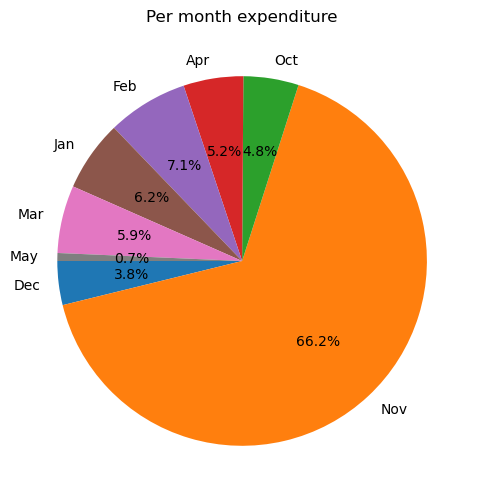

In [48]:
plt.figure(figsize=(6, 6))
plt.pie(A['Debit'], labels=A['Month'], autopct='%1.1f%%', startangle=180)
plt.title('Per month expenditure')
plt.show()


In [49]:
Q=W[W['Month']=='Feb']
Q

,Txn Date,Description,Debit,Credit,Balance,Month,Year
173,1 Feb 2023,TO TRANSFER-\nUPI/DR/303243886480/Mr\nVikra/PY...,63.0,0.00,55097.64,Feb,2023
174,1 Feb 2023,TO TRANSFER-\nUPI/DR/303260486865/BATA\nIND/HD...,2904.0,0.00,52193.64,Feb,2023
175,1 Feb 2023,BY TRANSFER-\nUPI/CR/303256025507/GOOG\nLEPAY/...,0.0,6.00,52199.64,Feb,2023
176,2 Feb 2023,TO TRANSFER-\nUPI/DR/303374651667/Mr\nVikra/PY...,63.0,0.00,52136.64,Feb,2023
177,4 Feb 2023,TO TRANSFER-\nUPI/DR/303529977543/Mr\nVikra/PY...,66.0,0.00,52070.64,Feb,2023
178,4 Feb 2023,TO TRANSFER-\nUPI/DR/303544835237/Mr\nVikra/PY...,240.0,0.00,51830.64,Feb,2023
179,5 Feb 2023,TO TRANSFER-\nUPI/DR/303652305204/Mr\nVikra/PY...,66.0,0.00,51764.64,Feb,2023
180,5 Feb 2023,TO TRANSFER-\nUPI/DR/303655174175/Mr\nVikra/PY...,390.0,0.00,51374.64,Feb,2023
181,5 Feb 2023,TO TRANSFER-\nUPI/DR/303664195132/Mr\nVikra/PY...,70.0,0.00,51304.64,Feb,2023
182,6 Feb 2023,TO TRANSFER-\nUPI/DR/303775959062/Mr\nVikra/PY...,66.0,0.00,51238.64,Feb,2023


In [50]:
Q['Debit'].value_counts()

66.0      19
0.0        5
63.0       2
666.0      2
71.0       1
369.0      1
95.0       1
529.0      1
110.0      1
1380.0     1
322.0      1
50.0       1
270.0      1
2904.0     1
2000.0     1
70.0       1
390.0      1
240.0      1
391.0      1
Name: Debit, dtype: int64

### **Total earning monthly**

In [51]:
A = W.groupby(['Year', 'Month'])['Credit'].sum().reset_index()
A

,Year,Month,Credit
0,2022,Dec,1952.97
1,2022,Nov,24.00
2,2022,Oct,3229.32
3,2023,Apr,116.33
4,2023,Feb,14604.59
5,2023,Jan,31045.00
6,2023,Mar,369.00
7,2023,May,5.00


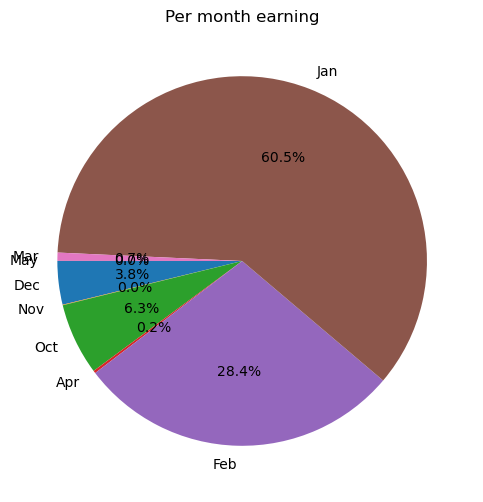

In [52]:
plt.figure(figsize=(6, 6))
plt.pie(A['Credit'], labels=A['Month'], autopct='%1.1f%%', startangle=180)
plt.title('Per month earning')
plt.show()
